# KPI Breakdown

Key Performance Indicators (KPIs)
The main KPI for this project is On-Time Delivery Rate (is_on_time), which measures the percentage of orders delivered on or before the promised delivery time. This metric is central because:

- It directly impacts customer satisfaction and brand loyalty.

- It reflects operational efficiency in each market.

- It provides a clear benchmark for comparing performance between markets.

The goal of this analysis is to understand why the worst-performing market underperforms and why the best-performing market excels.
To do this, is_on_time will be analyzed alongside several supporting KPIs that may explain these differences.

Supporting KPIs

1. Cuisine Type – Identifies whether certain cuisines are more prone to lateness, helping explain market differences.

2. Market Type – Captures the identity of each market for performance comparison.

3. Busy Ratio – Indicates market busyness at a given time; high values may drive lateness.

4. Order-to-Dasher Ratio – Measures balance between order demand and driver availability.

5. Hour of Day – Reveals time-based operational challenges (e.g., lunch rush vs. late-night).

6. Order Volume – Assesses the scale of operations and its correlation with lateness.

The analysis then investigates why the worst-performing market lags behind and what factors contribute to the best-performing market’s success.

# Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("clean_dataset.csv")

# Define KPIs

### is_on_time - Primary KPI

### Threshold Selection: 20-Minute Delivery Delay

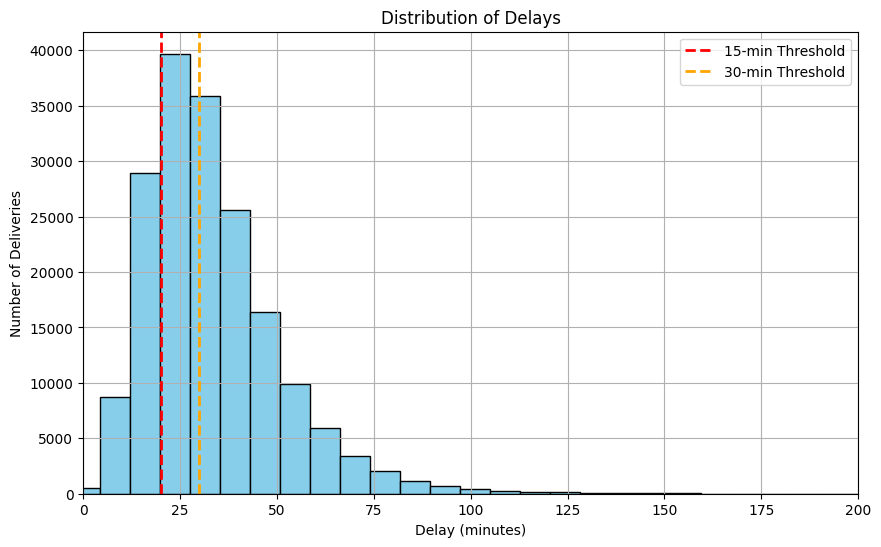

In [3]:
import matplotlib.pyplot as plt

df_filtered = df[df['delay'] <= 500]

plt.figure(figsize=(10, 6))
plt.hist(df_filtered['delay'], bins=60, color='skyblue', edgecolor='black')

plt.axvline(20, color='red', linestyle='dashed', linewidth=2, label='15-min Threshold')
plt.axvline(30, color='orange', linestyle='dashed', linewidth=2, label='30-min Threshold')

plt.xlabel("Delay (minutes)")
plt.ylabel("Number of Deliveries")
plt.title("Distribution of Delays")
plt.legend()
plt.grid(True)
plt.xlim(0, 200)

plt.show()



The histogram above shows the distribution of delays in early 2015.

- The red dashed line (15 min) is too strict, as it marks many on-time deliveries as late.  
- The orange dashed line (30 min) is too lenient, allowing a significant portion of clearly late deliveries to be considered on time.  

A 20-minute threshold (not shown here, but falling between these two lines) balances **customer expectations in 2015** with operational realities, flagging genuine delays while avoiding false positives.

For this analysis, a delivery is considered **"late"** if it arrives **20 minutes or more** past the promised time.  
This threshold reflects **2015 industry norms**, when customers typically tolerated slightly longer delays compared to today's standards.  
It also accounts for **normal operational variability** (e.g., traffic, preparation time) while still flagging delays that are likely to impact customer satisfaction.


In [4]:
df['is_late'] = df['delay'] > 20
df['is_on_time'] = 1 - df['is_late']

In [5]:
on_time_rate = df['is_on_time'].mean()
print(f"Overall on-time rate: {on_time_rate:.2%}")

Overall on-time rate: 21.68%


Overall on-time delivery rate: 21.68%

This dataset comes from early 2015, when delivery operations were still developing, so lower on-time rates are expected.

At the time, logistical networks, real-time tracking, and dasher allocation algorithms were less optimized compared to present-day standards.

## Secondary KPIs

### Region KPI

There are 5 markets which represent different regions/locations.

In [6]:
region_kpi = df.groupby('market_id')['is_on_time'].mean().sort_values()
print(region_kpi)

market_id
1    0.187393
4    0.209510
6    0.212214
2    0.228238
3    0.232285
5    0.244206
Name: is_on_time, dtype: float64


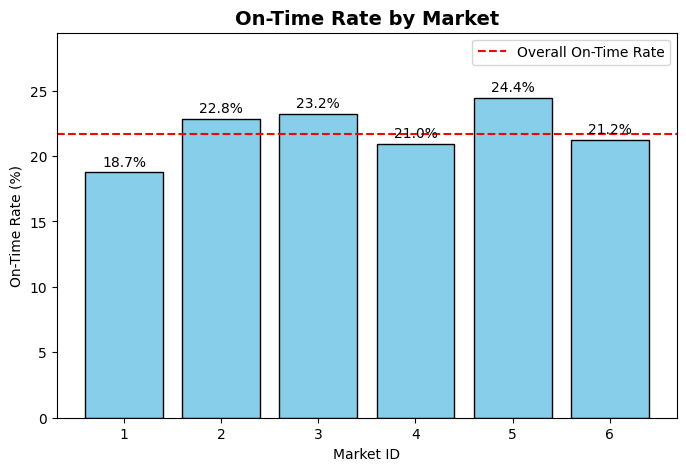

In [7]:
import matplotlib.pyplot as plt

on_time_rates = {
    1.0: 0.187393,
    4.0: 0.209510,
    6.0: 0.212214,
    2.0: 0.228238,
    3.0: 0.232285,
    5.0: 0.244206
}

markets = list(on_time_rates.keys())
rates = [v * 100 for v in on_time_rates.values()]

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(markets, rates, color='skyblue', edgecolor='black')

# Add value labels
for bar, rate in zip(bars, rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f"{rate:.1f}%", ha='center', fontsize=10)

plt.axhline(21.68, color='red', linestyle='--', label='Overall On-Time Rate')
plt.title("On-Time Rate by Market", fontsize=14, fontweight='bold')
plt.xlabel("Market ID")
plt.ylabel("On-Time Rate (%)")
plt.ylim(0, max(rates) + 5)
plt.legend()
plt.show()


- Best performing market: Market 5 (24.42%)

- Worst performing market: Market 1 (18.74%)

Insights

1. Market 1’s on-time rate is ~5.7 percentage points lower than the best-performing market — a notable performance gap.

2. A gap of this size at the market level is significant, given that late deliveries directly affect customer satisfaction, repeat orders, and brand perception.

This suggests we should prioritize Market 1 for root cause analysis, focusing on operational and local factors that may be driving delays.

### Cuisine KPI

In [8]:
cuisine_counts = df['store_primary_category'].value_counts()
common_cuisines = cuisine_counts[cuisine_counts >= 200].index
df['cuisine_grouped'] = df['store_primary_category'].apply(lambda x: x if x in common_cuisines else 'Other')
cuisine_kpi = df.groupby('cuisine_grouped')['is_on_time'].mean().sort_values()

In [9]:
print("Worst Performing Cuisines")
print(cuisine_kpi.sort_values(ascending=True).head(5))
print('\n')  
print("Best Performing Cuisines")
print(cuisine_kpi.sort_values(ascending=False).head(5))  


Worst Performing Cuisines
cuisine_grouped
brazilian    0.071429
nepalese     0.128920
steak        0.137331
cajun        0.137821
sushi        0.140351
Name: is_on_time, dtype: float64


Best Performing Cuisines
cuisine_grouped
smoothie     0.303953
breakfast    0.302464
hawaiian     0.297464
sandwich     0.284910
mexican      0.280271
Name: is_on_time, dtype: float64


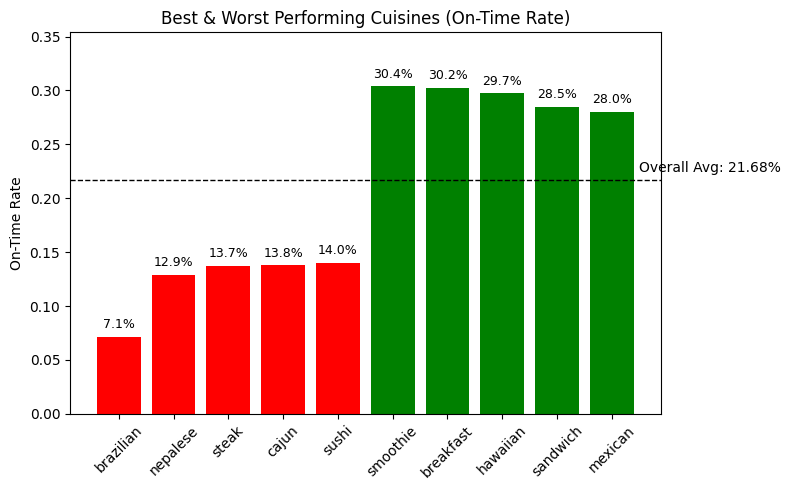

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

worst = pd.Series({
    'brazilian': 0.071429,
    'nepalese': 0.128920,
    'steak': 0.137331,
    'cajun': 0.137821,
    'sushi': 0.140351
})

best = pd.Series({
    'smoothie': 0.303953,
    'breakfast': 0.302464,
    'hawaiian': 0.297464,
    'sandwich': 0.284910,
    'mexican': 0.280271
})

overall_avg = 0.2168  # Overall on-time rate

df_cuisine = pd.concat([worst, best])
colors = ['red'] * len(worst) + ['green'] * len(best)

plt.figure(figsize=(8, 5))
bars = plt.bar(df_cuisine.index, df_cuisine.values, color=colors)

# Add average line
plt.axhline(overall_avg, color='black', linestyle='--', linewidth=1)
plt.text(len(df_cuisine)-0.5, overall_avg + 0.005, f'Overall Avg: {overall_avg:.2%}', 
         color='black', fontsize=10, va='bottom')

plt.ylabel('On-Time Rate')
plt.title('Best & Worst Performing Cuisines (On-Time Rate)')
plt.xticks(rotation=45)
plt.ylim(0, max(df_cuisine.values) + 0.05)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.1%}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


- There are substantial differences in on-time delivery rates between cuisines.

- Cuisines like Brazilian and Nepalese have particularly low on-time rates, suggesting potential operational challenges (e.g., longer prep times, fewer specialized kitchens).

- Conversely, items like smoothies and breakfast have higher on-time rates, possibly due to faster preparation or streamlined order handling.

- These differences could help prioritize which cuisine types may need operational improvements or more accurate preparation time estimates.

### Hour KPI

In [11]:
df['hour_of_day'].value_counts()

hour_of_day
2     33733
1     26270
3     24241
20    14330
4     13578
19    12404
0     11747
21    10519
22     8064
23     7523
5      6243
18     4632
17     3149
16     1990
6      1253
15      513
14       40
7         9
8         2
Name: count, dtype: int64

- Hours with very few deliveries can produce misleading on-time rates (e.g., 0% lateness at 8 AM is based on only 2 orders).

- To ensure reliability and focus on high-impact periods, hours with fewer than 500 deliveries are excluded from rate calculations, though they’re kept separately for niche operational checks.

In [12]:
hour_counts = df.groupby('hour_of_day').size().reset_index(name='delivery_count')

df_with_counts = df.merge(hour_counts, on='hour_of_day')

low_volume_threshold = 500

# Filter out low-volume hours before calculating rates
hour_kpi = (
    df_with_counts[df_with_counts['delivery_count'] >= low_volume_threshold]
    .groupby('hour_of_day')['is_on_time']
    .mean()
    .sort_values()
)

print(hour_kpi)


hour_of_day
2     0.075356
3     0.121736
1     0.163456
15    0.208577
19    0.235972
16    0.240704
20    0.256943
0     0.285349
4     0.292016
17    0.303588
23    0.316363
22    0.346230
21    0.358019
6     0.371109
5     0.403812
18    0.405656
Name: is_on_time, dtype: float64


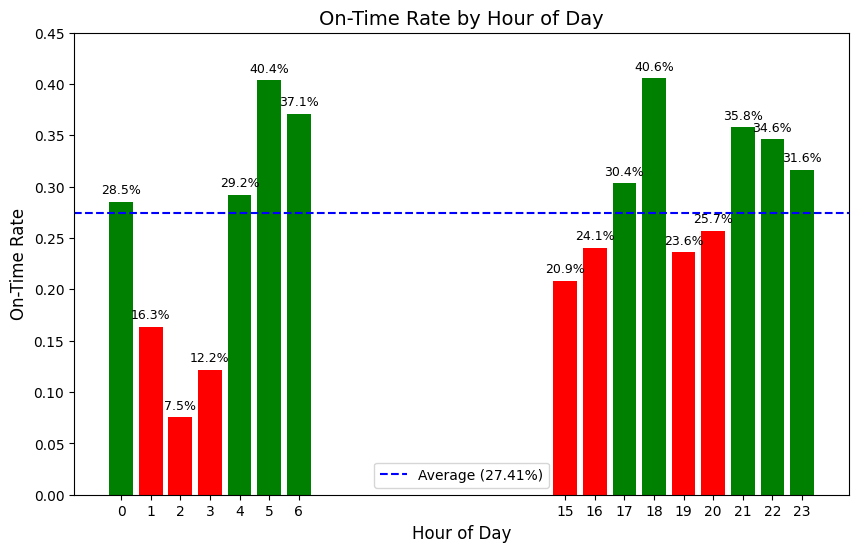

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
hourly_data = {
    2: 0.075356,
    3: 0.121736,
    1: 0.163456,
    15: 0.208577,
    19: 0.235972,
    16: 0.240704,
    20: 0.256943,
    0: 0.285349,
    4: 0.292016,
    17: 0.303588,
    23: 0.316363,
    22: 0.346230,
    21: 0.358019,
    6: 0.371109,
    5: 0.403812,
    18: 0.405656
}

df_hourly = pd.DataFrame(list(hourly_data.items()), columns=["hour_of_day", "is_on_time"])
df_hourly = df_hourly.sort_values("hour_of_day")  

# Average on-time rate
avg_on_time = df_hourly["is_on_time"].mean()

colors = ['red' if val < avg_on_time else 'green' for val in df_hourly['is_on_time']]

plt.figure(figsize=(10, 6))
bars = plt.bar(df_hourly['hour_of_day'], df_hourly['is_on_time'], color=colors)

# Average line
plt.axhline(y=avg_on_time, color='blue', linestyle='--', linewidth=1.5, label=f'Average ({avg_on_time:.2%})')

plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("On-Time Rate", fontsize=12)
plt.title("On-Time Rate by Hour of Day", fontsize=14)
plt.xticks(df_hourly['hour_of_day'])
plt.ylim(0, 0.45)
plt.legend()

for bar, rate in zip(bars, df_hourly['is_on_time']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f"{rate:.1%}", 
             ha='center', va='bottom', fontsize=9)

plt.show()


Key Observations
- Worst performance: 2 AM shows the lowest on-time delivery rate (7.54%), followed by 3 AM (12.17%).

- Afternoon/evening dips: Rates remain low between 3 PM (20.86%) and 8 PM (25.69%), suggesting dinner rush effects.

- Best performance: Early morning (5–6 AM) and late evening (10–11 PM) show the highest rates, exceeding 37%.

Possible Drivers
- Overnight low rates (1–3 AM) may reflect limited driver availability or longer distances per delivery.

- Afternoon and evening dips could be tied to peak order volumes during lunch/dinner rush.

- Higher rates in early morning hours may be due to lower order demand and less congestion.

### Busy KPI

Before calculating the busy kpi, we need to calculate the busy_ratio that is how many dashers are actually busy divided by total on shift dashers.

In [14]:
df['busy_ratio'] = df['total_busy_dashers']/df['total_onshift_dashers']

Binning the busy_ratio.

In [15]:
df['busy_bin'] = pd.cut(df['busy_ratio'], bins=[0, 0.25, 0.5, 0.75, 1.0], 
                        labels=['Low', 'Medium', 'High', 'Very High'])

busy_kpi = df.groupby('busy_bin')['is_on_time'].mean().sort_index()
print(busy_kpi)

busy_bin
Low          0.423295
Medium       0.393113
High         0.316227
Very High    0.190833
Name: is_on_time, dtype: float64


/var/folders/w6/6zbxrfhs3673cn004nn1v62h0000gn/T/ipykernel_19070/2982600484.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  busy_kpi = df.groupby('busy_bin')['is_on_time'].mean().sort_index()


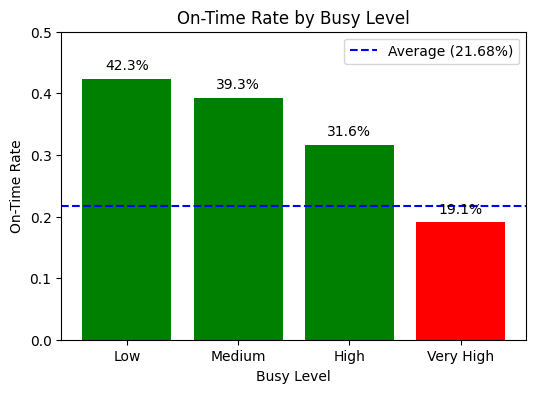

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'busy_bin': ['Low', 'Medium', 'High', 'Very High'],
    'is_on_time': [0.423295, 0.393113, 0.316227, 0.190833]
}
df_busy = pd.DataFrame(data)

avg_on_time = df['is_on_time'].mean()

colors = ['green' if val >= avg_on_time else 'red' for val in df_busy['is_on_time']]

plt.figure(figsize=(6,4))
bars = plt.bar(df_busy['busy_bin'], df_busy['is_on_time'], color=colors)

# Add average line
plt.axhline(y=avg_on_time, color='blue', linestyle='--', label=f'Average ({avg_on_time:.2%})')

plt.ylabel('On-Time Rate')
plt.xlabel('Busy Level')
plt.title('On-Time Rate by Busy Level')
plt.ylim(0, 0.5)
plt.legend()

for bar, val in zip(bars, df_busy['is_on_time']):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.01, f"{val:.1%}", 
             ha='center', va='bottom', fontsize=10)

plt.show()


- Performance declines steadily as lateness severity increases.

- Orders in the Very High lateness category have less than a 1-in-5 chance of being on time, indicating severe operational issues.

- The gap between Low (42.33%) and Very High (19.08%) suggests significant room for improvement in late-stage order management.

### Number of items

Number of items in each order

In [17]:
bins = [0, 2, 4, 7, 12, df['total_items'].max()]
labels = ['Very Small', 'Small', 'Medium', 'Large', 'Very Large']

df['items_bin'] = pd.cut(df['total_items'], bins=bins, labels=labels, include_lowest=True)
item_kpi = df.groupby('items_bin')['is_on_time'].mean().sort_values()
print(item_kpi)


items_bin
Large         0.093937
Very Large    0.123904
Medium        0.139957
Small         0.195882
Very Small    0.265458
Name: is_on_time, dtype: float64


/var/folders/w6/6zbxrfhs3673cn004nn1v62h0000gn/T/ipykernel_19070/232215574.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  item_kpi = df.groupby('items_bin')['is_on_time'].mean().sort_values()


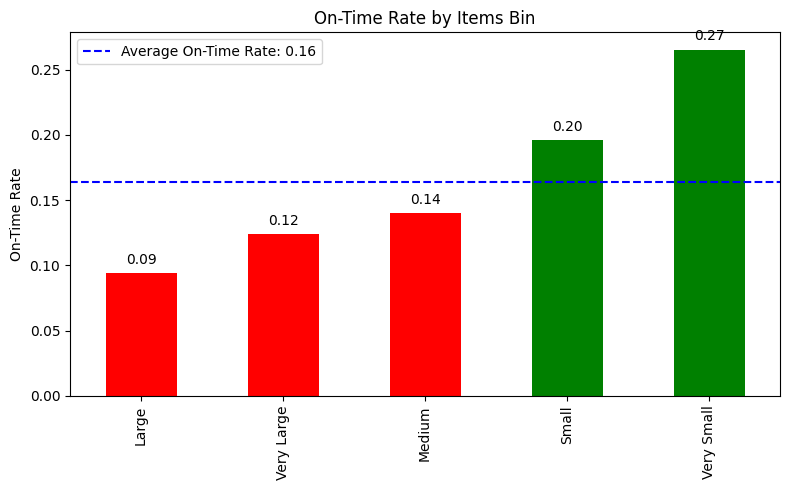

In [18]:
import matplotlib.pyplot as plt

on_time_items = {
    'Large': 0.093937,
    'Very Large': 0.123904,
    'Medium': 0.139957,
    'Small': 0.195882,
    'Very Small': 0.265458
}

import pandas as pd
on_time_items = pd.Series(on_time_items)

avg_on_time = on_time_items.mean()

colors = ['green' if rate >= avg_on_time else 'red' for rate in on_time_items]

fig, ax = plt.subplots(figsize=(8, 5))
on_time_items.plot(kind='bar', color=colors, ax=ax)

ax.axhline(avg_on_time, color='blue', linestyle='--', linewidth=1.5, label=f'Average On-Time Rate: {avg_on_time:.2f}')

ax.set_ylabel('On-Time Rate')
ax.set_title('On-Time Rate by Items Bin')
ax.legend()

for i, rate in enumerate(on_time_items):
    ax.text(i, rate + 0.005, f"{rate:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


- Clear negative relationship: Larger orders have lower on-time rates.

- Large orders perform worst (9.39%), less than half the on-time rate of Very Small orders (26.55%).

- The performance gap suggests that order size is a significant driver of delays.

### Order to Dasher Ratio

This is the total outstanding orders divided by total onshidt dashers

In [19]:
df['order_to_dasher_ratio'] = df['total_outstanding_orders']/df['total_onshift_dashers']

In [20]:
df['order_to_dasher_ratio_binned'] = pd.qcut(df['order_to_dasher_ratio'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


/Users/ridhampatel/Documents/DS/Projects/Doordash/venv/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [21]:
dasher_kpi = df.groupby('order_to_dasher_ratio_binned')['is_on_time'].mean().sort_values()
print(dasher_kpi)

order_to_dasher_ratio_binned
Very High    0.055670
High         0.127680
Medium       0.209376
Low          0.304302
Very Low     0.394779
Name: is_on_time, dtype: float64


/var/folders/w6/6zbxrfhs3673cn004nn1v62h0000gn/T/ipykernel_19070/4018982965.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dasher_kpi = df.groupby('order_to_dasher_ratio_binned')['is_on_time'].mean().sort_values()


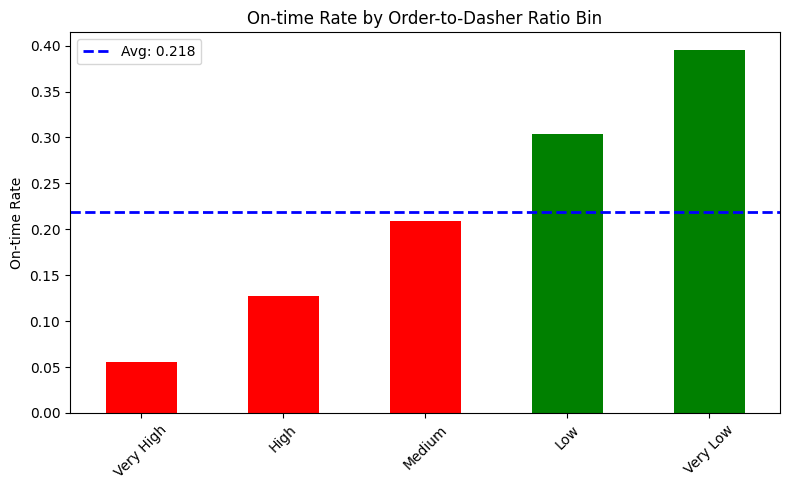

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

order_to_dasher_ratio_binned = pd.Series({
    'Very High': 0.055670,
    'High': 0.127680,
    'Medium': 0.209376,
    'Low': 0.304302,
    'Very Low': 0.394779
})

avg_rate = order_to_dasher_ratio_binned.mean()

colors = ['green' if val >= avg_rate else 'red' for val in order_to_dasher_ratio_binned]


plt.figure(figsize=(8, 5))
order_to_dasher_ratio_binned.plot(kind='bar', color=colors)

plt.axhline(avg_rate, color='blue', linestyle='--', linewidth=2, label=f'Avg: {avg_rate:.3f}')

plt.title('On-time Rate by Order-to-Dasher Ratio Bin')
plt.ylabel('On-time Rate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Key Insights:

- Higher order-to-dasher ratios lead to lower on-time delivery rates.

- When there are very few dashers relative to orders (Very High ratio), only ~6% of deliveries are on time.

- Lower ratios correspond to better performance.

- When the ratio is very low, nearly 40% of deliveries are on time.

- Business implication: Reducing the number of orders per dasher (or increasing available dashers) can significantly improve delivery punctuality, especially in high-demand periods.

- This confirms that order-to-dasher ratio is a critical operational KPI affecting delivery timeliness and should be monitored for intervention planning.

In [23]:
df.to_csv("kpi_dataset.csv", index=False)


# Next Steps


1. Quantify KPI impacts — Use statistical hypothesis testing (t-tests, ANOVA) to confirm whether differences in busy ratio, order size, cuisine type, and market performance are statistically significant.

2. Interaction effects — Apply regression models to see how KPIs interact (e.g., does busy ratio impact Market 1 more strongly than other markets?).

3. Simulate interventions — Run A/B test simulations to estimate the potential effect of operational changes (e.g., lowering busy ratio in Market 1).